# 1. Import Library and Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Pim
#calendar= "/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/calendar070922.csv"
#listing = "/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/listingszip070922.csv"
#neighbour = "/content/drive/MyDrive/AIrBNB/neighbourhoods.csv"
#neighbourjson = "/content/drive/MyDrive/AIrBNB/neighbourhoods.geojson"
#review = "/content/drive/MyDrive/AIrBNB/reviewszip.csv"

#cd=pd.read_csv(calendar)
#bls=pd.read_csv(listing)
#nb=pd.read_csv(neighbour)
#rv=pd.read_csv(review)

# Pim
lszDec21 = pd.read_csv('/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/listingszip_Dec21.csv')
lszMar22 = pd.read_csv('/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/listingszip_Mar22.csv')
lszJun22 = pd.read_csv('/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/listingszip_Jun22.csv')
lszSep22 = pd.read_csv('/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/listingszip_Sep22.csv')

# calzDec21 = pd.read_csv('/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/calendarzip_Dec21.csv')
# calzMar22 = pd.read_csv('/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/calendarzip_Mar22.csv')
# calzJun22 = pd.read_csv('/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/calendarzip_Jun22.csv')
# calzSep22 = pd.read_csv('/content/drive/MyDrive/KDAI/Semester 2 1/Data Mining & Business Analytics/AirBNB/calendarzip_Sep22.csv')

## Merge files

### Listings Zip

In [ ]:
merged_ls = [lszDec21, lszMar22, lszJun22, lszSep22]

listings = pd.concat(merged_ls)
listings.shape

(24354, 75)

In [ ]:
# listings.columns

#### Drop duplicated data

**After merging, it's seem some lists have more than 1 record, means the same list but not the latest information.**

In [ ]:
# listings[['id']].value_counts()

In [ ]:
# listings[['id','last_scraped']].sort_values(['id','last_scraped'])

In [ ]:
listings = listings.sort_values(['id','last_scraped']).drop_duplicates('id', keep='last')
# listings.shape

In [ ]:
listings[['id','last_scraped']].sort_values(['id','last_scraped'])

,id,last_scraped
0,2818,2022-09-07
1,20168,2022-09-07
2,27886,2022-09-07
3,28871,2022-09-07
4,29051,2022-09-07
...,...,...
6388,709813617447029862,2022-09-07
6389,709852157993854015,2022-09-07
6390,709864107711873246,2022-09-07
6391,709907213897529402,2022-09-07


**Duplicated data is gone!!**

In [ ]:
# listings[['id']].value_counts()

In [ ]:
# listings[['id','last_scraped']].sort_values(['id','last_scraped'])

### Calendar Zip

In [ ]:
# merged_cal = [calzDec21, calzMar22, calzJun22, calzSep22]

# calendar = pd.concat(merged_cal)
# calendar.shape

(8886286, 7)

In [ ]:
# calendar.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

#### Drop duplicated data

In [ ]:
# calendar[['listing_id', 'date']].value_counts()

listing_id          date      
49904641            2022-11-03    4
1928474             2022-12-01    4
26265461            2022-09-23    4
                    2022-09-22    4
                    2022-09-21    4
                                 ..
29350903            2023-08-03    1
                    2023-08-04    1
                    2023-08-05    1
                    2023-08-06    1
709986109543860789  2023-09-06    1
Length: 4506119, dtype: int64

In [ ]:
# calendar[['listing_id', 'date']].sort_values(['listing_id', 'date'])

,listing_id,date
50,2818,2021-12-06
51,2818,2021-12-07
52,2818,2021-12-08
53,2818,2021-12-09
54,2818,2021-12-10
...,...,...
1907846,709986109543860789,2023-09-02
1907847,709986109543860789,2023-09-03
1907848,709986109543860789,2023-09-04
1907849,709986109543860789,2023-09-05


In [ ]:
# calendar = calendar.sort_values(['listing_id', 'date']).drop_duplicates(['listing_id', 'date'], keep='last')
# calendar.shape

(4506119, 7)

In [ ]:
# calendar[['listing_id', 'date']].sort_values(['listing_id', 'date'])

,listing_id,date
50,2818,2021-12-06
51,2818,2021-12-07
52,2818,2021-12-08
53,2818,2021-12-09
54,2818,2021-12-10
...,...,...
1907846,709986109543860789,2023-09-02
1907847,709986109543860789,2023-09-03
1907848,709986109543860789,2023-09-04
1907849,709986109543860789,2023-09-05


In [ ]:
calzSep22.rename(columns={'listing_id': 'id'}, inplace=True)

In [ ]:
calzSep22.columns

Index(['id', 'date', 'available', 'price', 'adjusted_price', 'minimum_nights',
       'maximum_nights'],
      dtype='object')

### Listings + Calendar

In [ ]:
target_columns = ['id','neighbourhood_cleansed','latitude','longitude', 'room_type', 'accommodates','bathrooms_text', 'bedrooms', 'beds', 'amenities','license', 'instant_bookable']

data = pd.merge(calzSep22[['id', 'price', 'date', 'minimum_nights']], lszSep22[target_columns], on='id', how='left')
data.head()

,id,price,date,minimum_nights,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,license,instant_bookable
0,2818,$49.00,2022-09-07,3.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,2,1.5 shared baths,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",0363 5F3A 5684 6750 D14D,t
1,2818,$49.00,2022-09-08,3.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,2,1.5 shared baths,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",0363 5F3A 5684 6750 D14D,t
2,2818,$49.00,2022-09-09,3.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,2,1.5 shared baths,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",0363 5F3A 5684 6750 D14D,t
3,2818,$49.00,2022-09-10,3.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,2,1.5 shared baths,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",0363 5F3A 5684 6750 D14D,t
4,2818,$49.00,2022-09-11,3.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,2,1.5 shared baths,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",0363 5F3A 5684 6750 D14D,t


# 2. Data Preparation

## 2.2 Drop unimportant features

In [ ]:
# listings = data.copy()

In [ ]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,source
0,2818,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,0,1,0,1.86,city scrape
1,20168,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.22,previous scrape
2,27886,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.89,4.79,0363 974D 4986 7411 88D8,t,1,0,1,0,1.78,city scrape
3,28871,https://www.airbnb.com/rooms/28871,20220907151523,2022-09-07,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.96,4.83,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,2.92,city scrape
4,29051,https://www.airbnb.com/rooms/29051,20220907151523,2022-09-07,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.87,4.77,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.16,city scrape


In [ ]:
# Blank column
listings.drop(columns="bathrooms" , inplace=True)
listings.drop(columns="neighbourhood_group_cleansed" , inplace=True)
listings.drop(columns="calendar_updated" , inplace=True)

In [ ]:
# Unqiue value
listings.drop(columns="listing_url" , inplace=True)
listings.drop(columns="picture_url" , inplace=True)
listings.drop(columns="host_url" , inplace=True)
listings.drop(columns="host_thumbnail_url" , inplace=True)
listings.drop(columns="host_picture_url" , inplace=True)
# No Reference
listings.drop(columns="minimum_minimum_nights" , inplace=True)
listings.drop(columns="maximum_minimum_nights" , inplace=True)
listings.drop(columns="minimum_maximum_nights" , inplace=True)
listings.drop(columns="maximum_maximum_nights" , inplace=True)

In [ ]:
listings.drop(columns="description" , inplace=True)
listings.drop(columns="name" , inplace=True)
listings.drop(columns="neighborhood_overview" , inplace=True)
listings.drop(columns="host_about" , inplace=True)
listings.drop(columns="scrape_id" , inplace=True)
listings.drop(columns="host_name" , inplace=True)
listings.drop(columns="last_scraped" , inplace=True)
listings.drop(columns="calendar_last_scraped" , inplace=True)
listings.drop(columns="first_review" , inplace=True)
listings.drop(columns="host_verifications" , inplace=True) # use 'host_identity_verified'
listings.drop(columns="minimum_nights_avg_ntm" , inplace=True)
listings.drop(columns="maximum_nights_avg_ntm" , inplace=True)

In [ ]:
listings.drop(columns="host_neighbourhood" , inplace=True) # 'host_location' is more important
listings.drop(columns="neighbourhood" , inplace=True) # use 'neighbourhood_cleansed'

In [ ]:
# 'calculated_host_listings_count' is overall
listings.drop(columns="calculated_host_listings_count_entire_homes" , inplace=True)
listings.drop(columns="calculated_host_listings_count_private_rooms" , inplace=True)
listings.drop(columns="calculated_host_listings_count_shared_rooms" , inplace=True)

In [ ]:
listings.drop(columns="property_type" , inplace=True) # use 'room_type'

**Drop 30 features**

In [ ]:
listings.shape

(8241, 45)

In [ ]:
listings.head()

,id,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,reviews_per_month,source
0,2818,3159,2008-09-24,"Amsterdam, Netherlands",within an hour,100%,100%,t,1,1,...,5.00,4.97,4.98,4.69,4.82,0363 5F3A 5684 6750 D14D,t,1,1.86,city scrape
1,20168,59484,2009-12-02,"Amsterdam, Netherlands",within an hour,100%,98%,f,5,5,...,4.79,4.63,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,2.22,previous scrape
2,27886,97647,2010-03-23,"Amsterdam, Netherlands",within an hour,100%,100%,f,1,1,...,4.95,4.95,4.92,4.89,4.79,0363 974D 4986 7411 88D8,t,1,1.78,city scrape
3,28871,124245,2010-05-13,"Amsterdam, Netherlands",within an hour,100%,100%,t,2,2,...,4.89,4.96,4.94,4.96,4.83,0363 607B EA74 0BD8 2F6F,f,2,2.92,city scrape
4,29051,124245,2010-05-13,"Amsterdam, Netherlands",within an hour,100%,100%,t,2,2,...,4.84,4.92,4.92,4.87,4.77,0363 607B EA74 0BD8 2F6F,f,2,4.16,city scrape


In [ ]:
listings.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,...,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,8.241000e+03,8.241000e+03,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,7830.000000,8091.000000,8241.000000,...,8241.000000,7337.00000,7329.000000,7328.000000,7329.000000,7329.000000,7329.000000,7329.000000,8241.000000,7337.000000
mean,9.455284e+16,1.013613e+08,3.170368,4.899041,52.365778,4.892250,2.988836,1.602682,1.960697,5.312947,...,1.114428,4.79356,4.827877,4.740826,4.866533,4.872068,4.773194,4.636968,2.086883,1.268371
std,2.278913e+17,1.301759e+08,27.209835,36.045989,0.021770,0.041648,1.482297,0.940492,1.637006,40.377803,...,2.738150,0.33805,0.282028,0.352946,0.265795,0.273677,0.274590,0.334934,2.994732,2.217496
min,2.818000e+03,3.159000e+03,0.000000,0.000000,52.268010,4.742430,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,1.489044e+07,9.678732e+06,1.000000,1.000000,52.355070,4.867110,2.000000,1.000000,1.000000,2.000000,...,0.000000,4.73000,4.770000,4.640000,4.830000,4.860000,4.670000,4.500000,1.000000,0.290000
50%,3.223467e+07,3.560931e+07,1.000000,1.000000,52.365890,4.888640,2.000000,1.000000,1.000000,3.000000,...,0.000000,4.88000,4.910000,4.850000,4.950000,4.970000,4.840000,4.690000,1.000000,0.630000
75%,5.043223e+07,1.517597e+08,2.000000,3.000000,52.376660,4.910709,4.000000,2.000000,2.000000,4.000000,...,1.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.830000,2.000000,1.570000
max,7.099861e+17,4.783754e+08,1926.000000,1926.000000,52.442340,5.074204,16.000000,17.000000,34.000000,1001.000000,...,126.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,22.000000,104.110000


### Convert the incorrect data type to the correct data type

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 6392
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8241 non-null   int64  
 1   host_id                         8241 non-null   int64  
 2   host_since                      8241 non-null   object 
 3   host_location                   7469 non-null   object 
 4   host_response_time              6327 non-null   object 
 5   host_response_rate              6327 non-null   object 
 6   host_acceptance_rate            7230 non-null   object 
 7   host_is_superhost               8233 non-null   object 
 8   host_listings_count             8241 non-null   int64  
 9   host_total_listings_count       8241 non-null   int64  
 10  host_has_profile_pic            8241 non-null   object 
 11  host_identity_verified          8241 non-null   object 
 12  neighbourhood_cleansed          82

**Transform features before converting data type to float**

In [ ]:
listings[['price']]

,price
0,$49.00
1,$106.00
2,$136.00
3,$75.00
4,$55.00
...,...
6388,$175.00
6389,$630.00
6390,$375.00
6391,$244.00


In [ ]:
# Remove $ and %
listings[['host_response_rate','host_acceptance_rate','price']] = listings[['host_response_rate','host_acceptance_rate','price']].replace('\%|\$|\,','', regex=True)
listings[['host_response_rate','host_acceptance_rate','price']]

,host_response_rate,host_acceptance_rate,price
0,100,100,49.00
1,100,98,106.00
2,100,100,136.00
3,100,100,75.00
4,100,100,55.00
...,...,...,...
6388,NaN,NaN,175.00
6389,NaN,NaN,630.00
6390,NaN,NaN,375.00
6391,NaN,NaN,244.00


In [ ]:
# Convert to date time
listings[['host_since','last_review']] = listings[['host_since','last_review']].apply(pd.to_datetime, errors='coerce')

# Convert to string
listings[['id','host_id']] = listings[['id','host_id']].astype('string')

# Convert to float
listings[['host_response_rate','host_acceptance_rate','price']] = listings[['host_response_rate','host_acceptance_rate','price']].astype('float')

In [ ]:
# Transform features before converting data type to float
listings[['host_response_rate','host_acceptance_rate']] = listings[['host_response_rate','host_acceptance_rate']] / 100

listings[['host_response_rate','host_acceptance_rate','price']]

,host_response_rate,host_acceptance_rate,price
0,1.0,1.00,49.0
1,1.0,0.98,106.0
2,1.0,1.00,136.0
3,1.0,1.00,75.0
4,1.0,1.00,55.0
...,...,...,...
6388,NaN,NaN,175.0
6389,NaN,NaN,630.0
6390,NaN,NaN,375.0
6391,NaN,NaN,244.0


**Datatype after converting**

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8241 entries, 0 to 6392
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              8241 non-null   string        
 1   host_id                         8241 non-null   string        
 2   host_since                      8241 non-null   datetime64[ns]
 3   host_location                   7469 non-null   object        
 4   host_response_time              6327 non-null   object        
 5   host_response_rate              6327 non-null   float64       
 6   host_acceptance_rate            7230 non-null   float64       
 7   host_is_superhost               8233 non-null   object        
 8   host_listings_count             8241 non-null   int64         
 9   host_total_listings_count       8241 non-null   int64         
 10  host_has_profile_pic            8241 non-null   object        
 11  host

## 2.3 Data Cleaning

### 2.3.1 Deal with Missing values

**19 features have missing values**

In [ ]:
listings_null = listings.isnull().sum().sort_values(ascending = False)
listings_null.loc[listings_null > 0]

host_response_time             1914
host_response_rate             1914
source                         1348
host_acceptance_rate           1011
review_scores_cleanliness       913
review_scores_value             912
review_scores_accuracy          912
review_scores_checkin           912
review_scores_location          912
review_scores_communication     912
reviews_per_month               904
review_scores_rating            904
last_review                     904
host_location                   772
license                         530
bedrooms                        411
beds                            150
bathrooms_text                   19
host_is_superhost                 8
dtype: int64

**bathrooms_text**

In [ ]:
listings['bathrooms_text'].value_counts()

1 bath               3390
1.5 baths            2267
1 private bath        973
2 baths               477
1 shared bath         420
1.5 shared baths      239
2.5 baths             198
3 baths                99
3.5 baths              31
0 baths                21
0 shared baths         18
Shared half-bath       17
2 shared baths         16
3 shared baths         13
Half-bath               9
4.5 baths               8
3.5 shared baths        7
5 baths                 5
4 baths                 4
Private half-bath       4
5.5 baths               2
4 shared baths          2
2.5 shared baths        1
17 baths                1
Name: bathrooms_text, dtype: int64

In [ ]:
# Replace bathrooms_text with mode
listings['bathrooms_text'] = listings['bathrooms_text'].fillna('1 bath')

In [ ]:
listings['bathrooms_text'].value_counts()

1 bath               3409
1.5 baths            2267
1 private bath        973
2 baths               477
1 shared bath         420
1.5 shared baths      239
2.5 baths             198
3 baths                99
3.5 baths              31
0 baths                21
0 shared baths         18
Shared half-bath       17
2 shared baths         16
3 shared baths         13
Half-bath               9
4.5 baths               8
3.5 shared baths        7
5 baths                 5
4 baths                 4
Private half-bath       4
5.5 baths               2
4 shared baths          2
2.5 shared baths        1
17 baths                1
Name: bathrooms_text, dtype: int64

**source**

In [ ]:
listings['source'].value_counts()

city scrape        4332
previous scrape    2561
Name: source, dtype: int64

In [ ]:
# Replace source with mode
listings['source'] = listings['source'].fillna('city scrape')

In [ ]:
listings['source'].value_counts()

city scrape        5680
previous scrape    2561
Name: source, dtype: int64

**These columns have missing values because there have been no reviews since the residences joined Airbnb.**

**last_review**

In [ ]:
IDs = ['2818','917955','1658094','2553485','2606957','2754846']

listings[['host_since','last_review']].loc[listings['id'].isin(IDs)]

,host_since,last_review
0,2008-09-24,2022-08-30
189,2011-05-15,NaT
345,2013-09-12,NaT
468,2014-03-12,NaT
472,2012-09-06,NaT
494,2014-04-04,NaT


In [ ]:
# Replace last_review with host_since
listings['last_review'] = listings['last_review'].fillna(listings['host_since'])
listings[['host_since','last_review']].loc[listings['id'].isin(IDs)]

,host_since,last_review
0,2008-09-24,2022-08-30
189,2011-05-15,2011-05-15
345,2013-09-12,2013-09-12
468,2014-03-12,2014-03-12
472,2012-09-06,2012-09-06
494,2014-04-04,2014-04-04


In [ ]:
null_cols = ['review_scores_cleanliness','review_scores_value','review_scores_accuracy','review_scores_checkin',
             'review_scores_location','review_scores_communication','review_scores_rating','reviews_per_month',
             'host_response_rate','host_acceptance_rate']

listings[null_cols].loc[listings['id'].isin(IDs)]

,review_scores_cleanliness,review_scores_value,review_scores_accuracy,review_scores_checkin,review_scores_location,review_scores_communication,review_scores_rating,reviews_per_month,host_response_rate,host_acceptance_rate
0,5.0,4.82,4.94,4.97,4.69,4.98,4.89,1.86,1.00,1.0
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.22,0.0
494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,1.0


In [ ]:
# Replace these columns with 0
listings[null_cols] = listings[null_cols].fillna(0)
listings[null_cols].loc[listings['id'].isin(IDs)]

,review_scores_cleanliness,review_scores_value,review_scores_accuracy,review_scores_checkin,review_scores_location,review_scores_communication,review_scores_rating,reviews_per_month,host_response_rate,host_acceptance_rate
0,5.0,4.82,4.94,4.97,4.69,4.98,4.89,1.86,1.00,1.0
189,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
345,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
468,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
472,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.0
494,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.0


**bedrooms & beds**

In [ ]:
IDs_2 = ['307497','1047746','5707655','6297430']

listings[['id','bedrooms','beds']].loc[listings['id'].isin(IDs_2)]

,id,bedrooms,beds
45,307497,10.0,NaN
228,1047746,3.0,NaN
844,5707655,NaN,NaN
914,6297430,NaN,NaN


In [ ]:
# Replace bedrooms with 0
listings['bedrooms'] = listings['bedrooms'].fillna(0)

In [ ]:
# Replace beds with bedrooms
listings['beds'] = listings['beds'].fillna(listings['bedrooms'])

listings[['id','bedrooms','beds']].loc[listings['id'].isin(IDs_2)]

,id,bedrooms,beds
45,307497,10.0,10.0
228,1047746,3.0,3.0
844,5707655,0.0,0.0
914,6297430,0.0,0.0


**host_is_superhost**

In [ ]:
# Replace host_is_superhost with False
listings['host_is_superhost'] = listings['host_is_superhost'].fillna('f')

**host_response_rate and host_acceptance_rate**

In [ ]:
# Replace host_response_rate and host_acceptance_rate with 0
listings[['host_response_rate','host_acceptance_rate']] = listings[['host_response_rate','host_acceptance_rate']].fillna(0)

**host_response_time**

In [ ]:
# Replace host_response_time with No Information
listings['host_response_time'] = listings['host_response_time'].fillna('No Info')

**host_location**

In [ ]:
listings['host_location'].value_counts()

Amsterdam, Netherlands                       5375
Amsterdam, North Holland, Netherlands         720
Netherlands                                   231
NL                                            195
Amsterdam, North Holland, The Netherlands     137
                                             ... 
Aachen, North Rhine-Westphalia, Germany         1
Marbella, Andalusia, Spain                      1
Bussum, North Holland, Netherlands              1
Kemijärvi, Finland                              1
Porto, Portugal                                 1
Name: host_location, Length: 252, dtype: int64

In [ ]:
# Replace host_location with mode
listings['host_location'] = listings['host_location'].fillna('Amsterdam, Netherlands')
listings['host_location'].value_counts()

Amsterdam, Netherlands                       6147
Amsterdam, North Holland, Netherlands         720
Netherlands                                   231
NL                                            195
Amsterdam, North Holland, The Netherlands     137
                                             ... 
Aachen, North Rhine-Westphalia, Germany         1
Marbella, Andalusia, Spain                      1
Bussum, North Holland, Netherlands              1
Kemijärvi, Finland                              1
Porto, Portugal                                 1
Name: host_location, Length: 252, dtype: int64

**license**

In [ ]:
listings['license'] = listings['license'].str.replace(' ', '')

In [ ]:
listings[['license']].sort_values(['license']).value_counts()

license             
Exempt                  867
036378AD8875790E3C05     12
ABCD1234AB1289EFA0F9     11
036366EF20D743B61576      9
0363621055B54B4E8B5E      6
                       ... 
03635AB2F0568A294C62      1
03635AAFF3F875453CB0      1
03635A9C070029FC5811      1
03635A9601BD4A9DA4F3      1
Z2220787610000000000      1
Length: 6210, dtype: int64

In [ ]:
# Replace license with No License
listings['license'] = listings['license'].fillna('No License')

listings[['license']].sort_values(['license']).value_counts()

license             
Exempt                  867
No License              530
036378AD8875790E3C05     12
ABCD1234AB1289EFA0F9     11
036366EF20D743B61576      9
                       ... 
03635AD674097FD2FADC      1
03635AB2F0568A294C62      1
03635AAFF3F875453CB0      1
03635A9C070029FC5811      1
Z2220787610000000000      1
Length: 6211, dtype: int64

**minimum_nights**

In [ ]:
# Replace 'minimum_nights' with 0
listings['minimum_nights'] = listings['minimum_nights'].fillna(0)

**Price has value '0', not make sense**

In [ ]:
# Replace 'prices' with 0
listings['price'] = listings['price'].fillna(0)

In [ ]:
# Drop rows that price = 0
listings = listings.drop(listings[listings["price"] == 0].index)

In [ ]:
listings["price"].sort_values()

6461      15.0
6464      15.0
5015      15.0
2865      21.0
5317      25.0
         ...  
4411    6477.0
4410    6477.0
1400    6603.0
3925    7900.0
85      8812.0
Name: price, Length: 8228, dtype: float64

In [ ]:
listings.isnull().sum()

id                                0
host_id                           0
host_since                        0
host_location                     0
host_response_time                0
host_response_rate                0
host_acceptance_rate              0
host_is_superhost                 0
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
neighbourhood_cleansed            0
latitude                          0
longitude                         0
room_type                         0
accommodates                      0
bathrooms_text                    0
bedrooms                          0
beds                              0
amenities                         0
price                             0
minimum_nights                    0
maximum_nights                    0
has_availability                  0
availability_30                   0
availability_60                   0
availability_90             

### 2.3.2 Detect Outliers

In [ ]:
check_outliers = listings.select_dtypes(include=['float','int']).columns
check_outliers

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

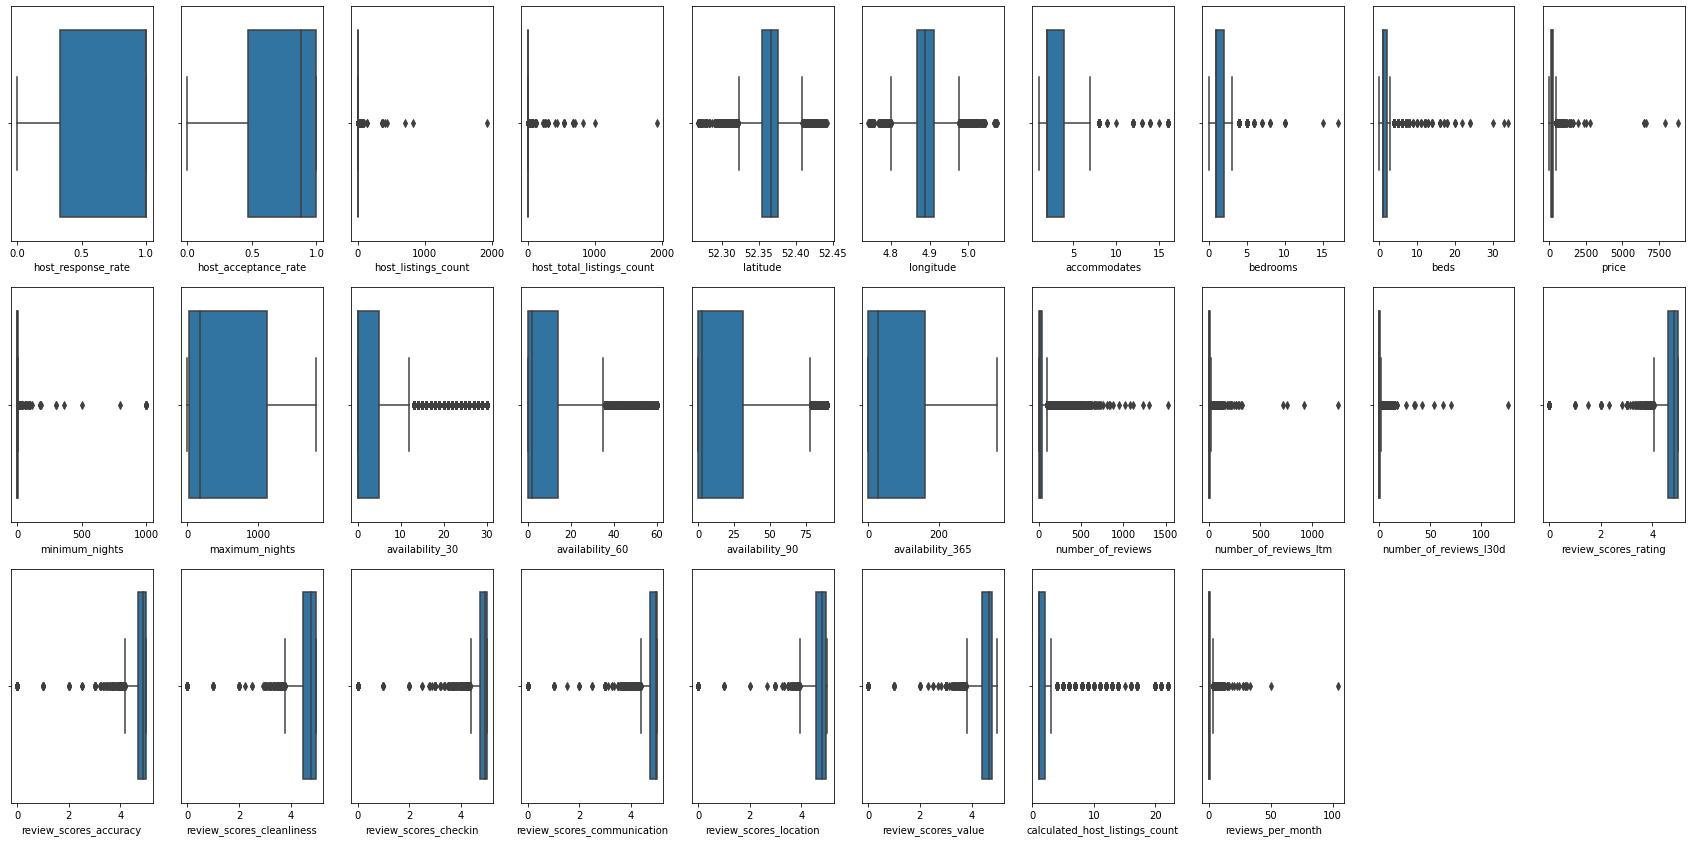

In [ ]:
plt.figure(figsize=(30,25))
for i in enumerate(check_outliers):
    plt.subplot(5,10,i[0]+1)
    sns.boxplot(listings[i[1]])

In [ ]:
outlier = ['host_listings_count','host_total_listings_count', 'accommodates','bedrooms', 'beds', 'minimum_nights',
       'availability_30', 'availability_60', 'availability_90', 'number_of_reviews','number_of_reviews_ltm',
       'number_of_reviews_l30d','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
       'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value',
       'calculated_host_listings_count','reviews_per_month']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

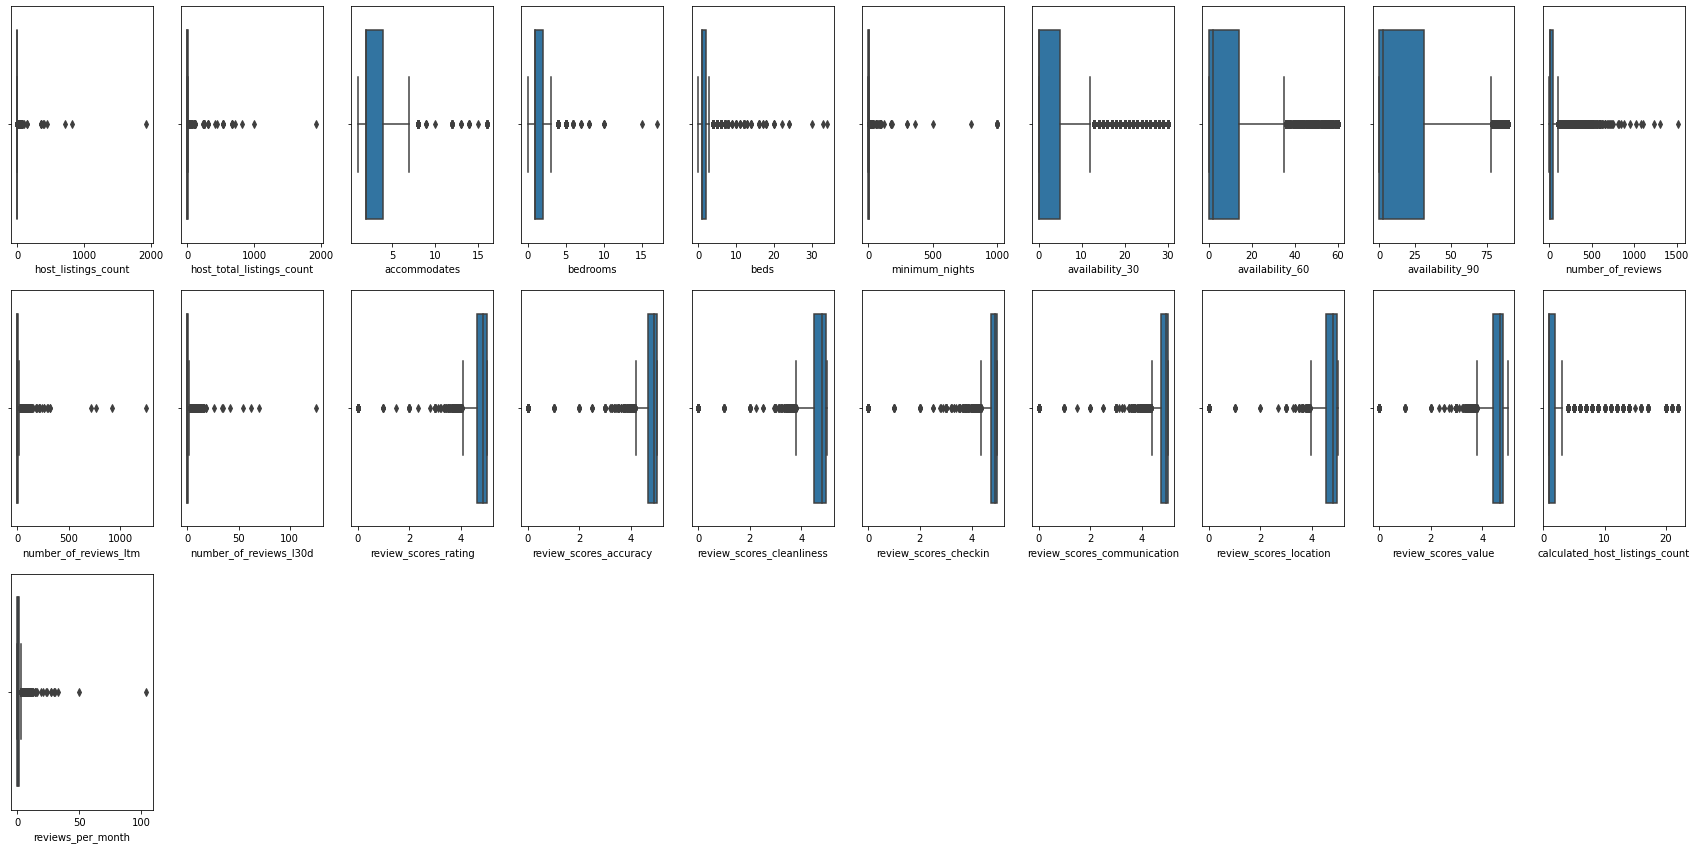

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(outlier):
    plt.subplot(4,10,i[0]+1)
    sns.boxplot(listings[i[1]])

In [ ]:
up = ['host_listings_count','host_total_listings_count', 'accommodates','bedrooms', 'beds', 'minimum_nights',
       'availability_30', 'availability_60', 'availability_90', 'number_of_reviews','number_of_reviews_ltm',
       'number_of_reviews_l30d','calculated_host_listings_count','reviews_per_month']

In [ ]:
for i in enumerate(up):
    q1 = listings[i[1]].quantile(.10)
    q3 = listings[i[1]].quantile(.90)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    filter_upper=listings[i[1]]>upper
    print(filter_upper.value_counts())
    listings.drop(listings[filter_upper].index , inplace=True)

False    7924
True      304
Name: host_listings_count, dtype: int64
False    7639
True      140
Name: host_total_listings_count, dtype: int64
False    7539
True       71
Name: accommodates, dtype: int64
False    7510
Name: bedrooms, dtype: int64
False    7506
True        4
Name: beds, dtype: int64
False    7242
True      264
Name: minimum_nights, dtype: int64
False    7136
Name: availability_30, dtype: int64
False    7136
Name: availability_60, dtype: int64
False    7136
Name: availability_90, dtype: int64
False    6940
True      196
Name: number_of_reviews, dtype: int64
False    6828
True       89
Name: number_of_reviews_ltm, dtype: int64
False    6766
True       48
Name: number_of_reviews_l30d, dtype: int64
False    6573
True      179
Name: calculated_host_listings_count, dtype: int64
False    6462
True       21
Name: reviews_per_month, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

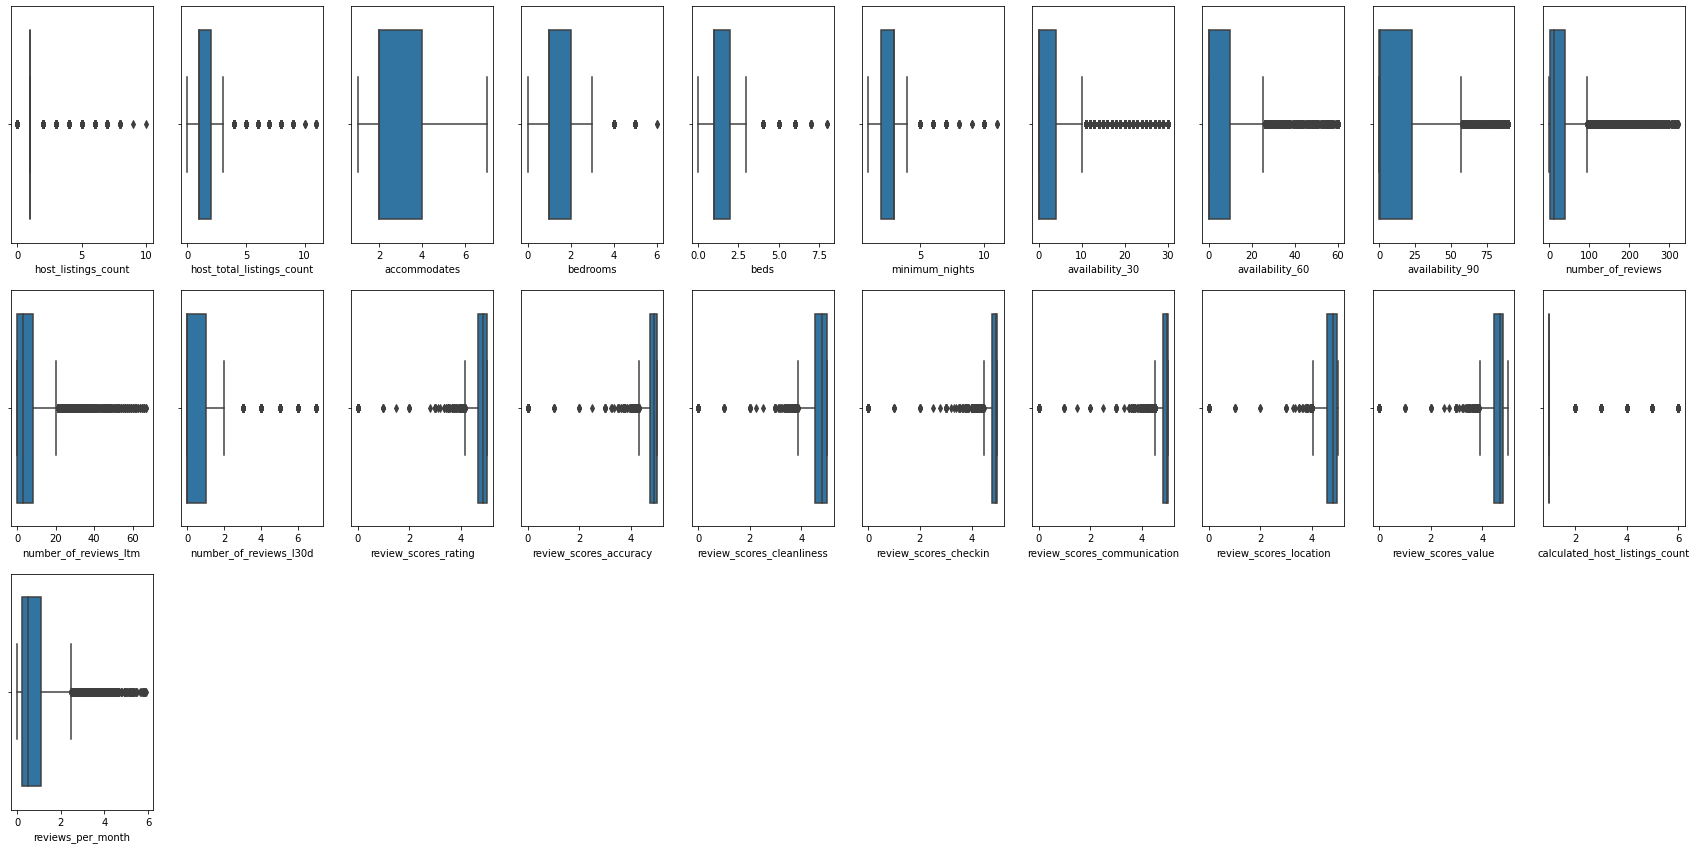

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(outlier):
    plt.subplot(4,10,i[0]+1)
    sns.boxplot(listings[i[1]])

In [ ]:
down = ['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location','review_scores_value']

In [ ]:
for i in enumerate(down):
    q1 = listings[i[1]].quantile(.10)
    q3 = listings[i[1]].quantile(.90)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    filter_lower=listings[i[1]]<lower
    print(filter_lower.value_counts())
    listings.drop(listings[filter_lower].index , inplace=True)

False    6455
Name: review_scores_rating, dtype: int64
False    6455
Name: review_scores_accuracy, dtype: int64
False    6455
Name: review_scores_cleanliness, dtype: int64
False    6455
Name: review_scores_checkin, dtype: int64
False    6455
Name: review_scores_communication, dtype: int64
False    6455
Name: review_scores_location, dtype: int64
False    6455
Name: review_scores_value, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

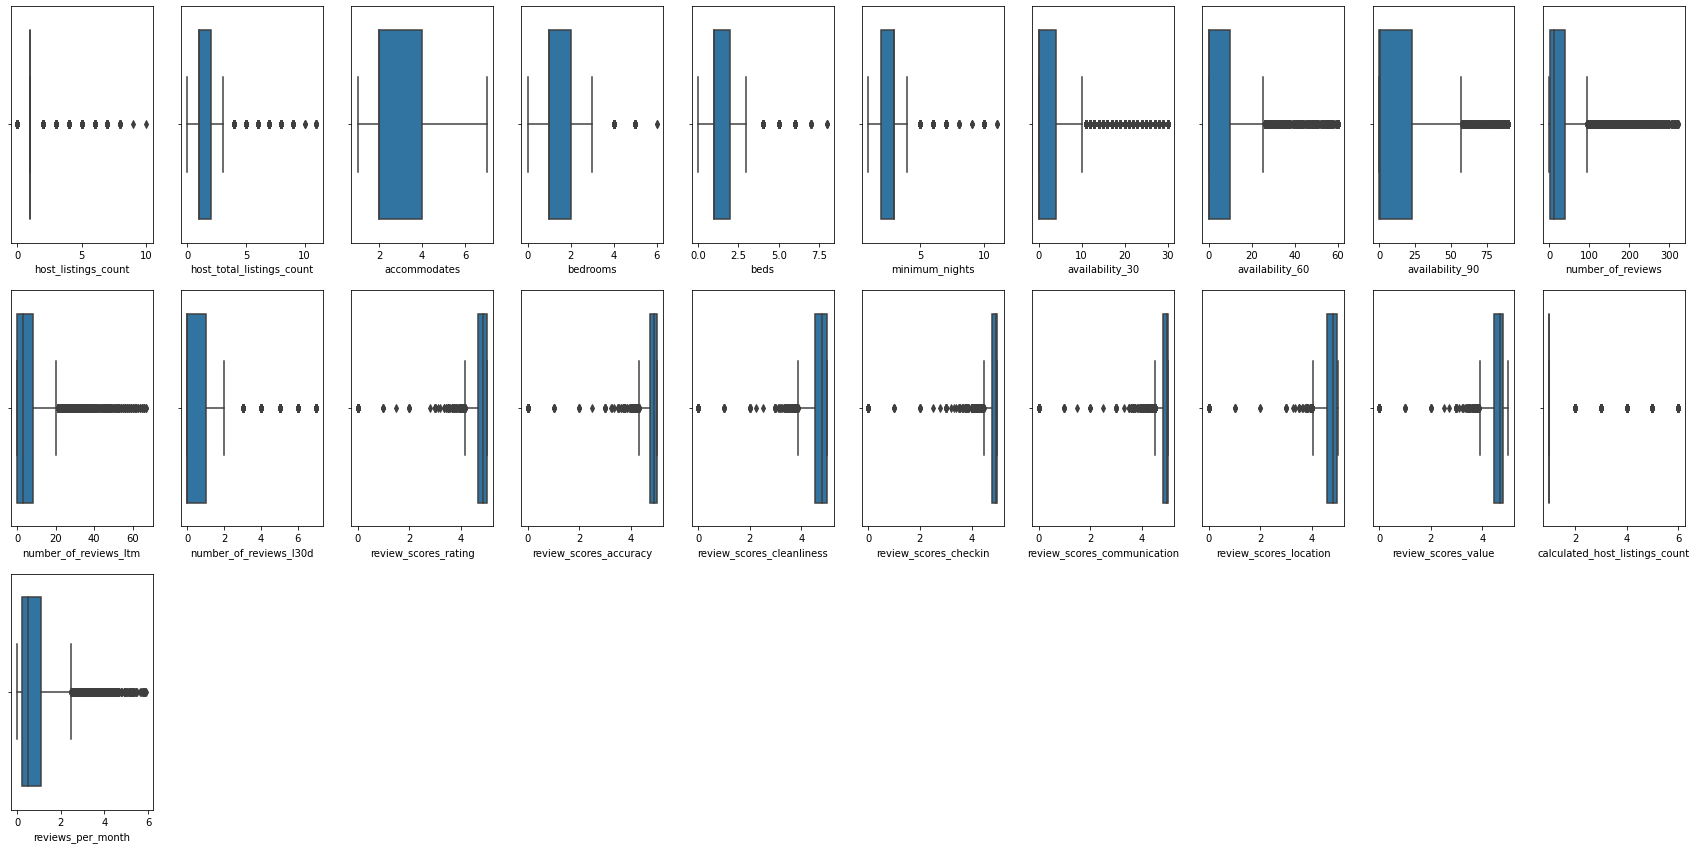

In [ ]:
plt.figure(figsize=(30,20))
for i in enumerate(outlier):
    plt.subplot(4,10,i[0]+1)
    sns.boxplot(listings[i[1]])

## 2.4 Feature Engineering

In [ ]:
df_listings = listings.copy() # Create new dataframe
#df_listings.drop(columns="date" , inplace=True).head()

In [ ]:
drop_cols = ['host_id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
        'latitude', 'longitude', 'bathrooms_text', 'bedrooms', 'beds',
       'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'reviews_per_month', 'source']

In [ ]:
df_listings.drop(columns=drop_cols , inplace=True)
df_listings.head()

,id,neighbourhood_cleansed,room_type,accommodates,amenities,price,minimum_nights,license,instant_bookable
0,2818,Oostelijk Havengebied - Indische Buurt,Private room,2,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",49.0,3,03635F3A56846750D14D,t
2,27886,Centrum-West,Private room,2,"[""Safe"", ""Fire extinguisher"", ""Hp neutral, eco...",136.0,2,0363974D4986741188D8,t
5,44391,Centrum-Oost,Entire home/apt,4,"[""Microwave"", ""Private entrance"", ""Oven"", ""Pat...",240.0,3,0363E76EF06AC1DD172C,f
8,49790,De Baarsjes - Oud-West,Entire home/apt,4,"[""Shampoo"", ""Essentials"", ""Dryer"", ""Cable TV"",...",250.0,3,036345740059C89C0671,f
9,55621,De Pijp - Rivierenbuurt,Entire home/apt,4,"[""Hair dryer"", ""Stove"", ""Washer"", ""Dishes and ...",222.0,3,0363CA777271E2DF1B5E,f


### Price to logprice

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution Plot')

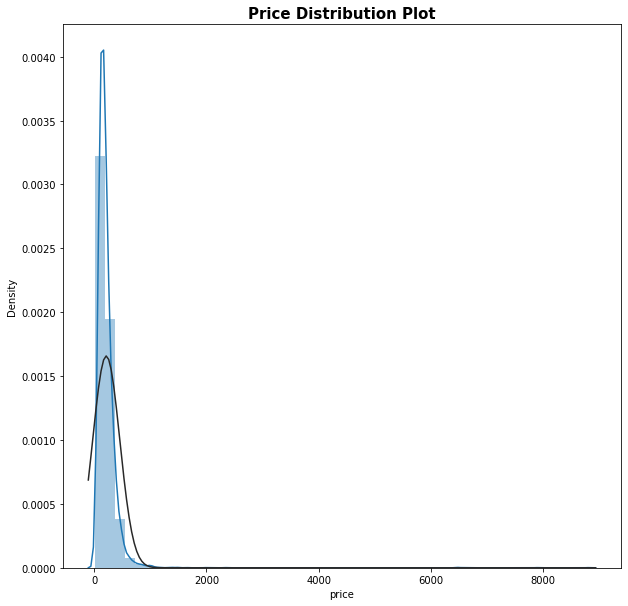

In [ ]:
from scipy.stats import norm

plt.figure(figsize=(10,10))
sns.distplot(df_listings['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

In [ ]:
df_listings['price_log'] = np.log(df_listings.price+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Log-Price Distribution Plot')

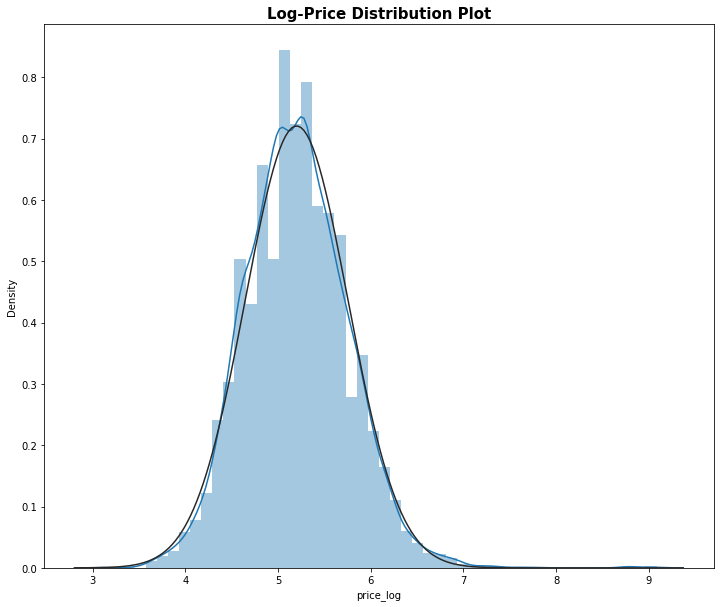

In [ ]:
plt.figure(figsize=(12,10))
sns.distplot(df_listings['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')

In [ ]:
df_listings.drop(columns="price" , inplace=True)

In [ ]:
df_listings.head()

,id,neighbourhood_cleansed,room_type,accommodates,amenities,minimum_nights,license,instant_bookable,price_log
0,2818,Oostelijk Havengebied - Indische Buurt,Private room,2,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",3,03635F3A56846750D14D,t,3.912023
2,27886,Centrum-West,Private room,2,"[""Safe"", ""Fire extinguisher"", ""Hp neutral, eco...",2,0363974D4986741188D8,t,4.919981
5,44391,Centrum-Oost,Entire home/apt,4,"[""Microwave"", ""Private entrance"", ""Oven"", ""Pat...",3,0363E76EF06AC1DD172C,f,5.484797
8,49790,De Baarsjes - Oud-West,Entire home/apt,4,"[""Shampoo"", ""Essentials"", ""Dryer"", ""Cable TV"",...",3,036345740059C89C0671,f,5.525453
9,55621,De Pijp - Rivierenbuurt,Entire home/apt,4,"[""Hair dryer"", ""Stove"", ""Washer"", ""Dishes and ...",3,0363CA777271E2DF1B5E,f,5.407172


In [ ]:
df_listings['price_log'].describe()

count    6455.000000
mean        5.199718
std         0.553762
min         3.091042
25%         4.836282
50%         5.192957
75%         5.525453
max         9.083983
Name: price_log, dtype: float64

### host_location

In [ ]:
# df_listings['host_location'].value_counts()

**Create new feature "isAmsterdam"**

In [ ]:
# import re # Regular Expression

# df_listings['isAmsterdam'] = df_listings['host_location'].str.extract(r'(Amsterdam)')
# df_listings['isAmsterdam'] = df_listings['isAmsterdam'].str.replace(r'Amsterdam', '1', regex=True)
# df_listings['isAmsterdam'] = df_listings['isAmsterdam'].fillna(0)

**Drop "host_location" column**

In [ ]:
# df_listings = df_listings.drop(['host_location'], axis=1)
# df_listings.head()

### bathrooms_text

**Explore "bathrooms_text" column**

In [ ]:
array = ['308028', '12392592','10564421','291752']
df_listings[['id','bathrooms_text']].loc[df_listings['id'].isin(array)]

,id,bathrooms_text
222285,10564421,Half-bath
222286,10564421,Half-bath
222287,10564421,Half-bath
222288,10564421,Half-bath
222289,10564421,Half-bath
...,...,...
2503891,308028,Private half-bath
2503892,308028,Private half-bath
2503893,308028,Private half-bath
2503894,308028,Private half-bath


**Replace text "Half/half" to 0.5**

In [ ]:
df_listings['bathrooms_text'] = df_listings['bathrooms_text'].str.replace(r'Half|half', '0.5', regex=True)

#df_listings[['id','bathrooms_text']].loc[df_listings['id'].isin(array)]

**Create new feature "bathrooms"**

In [ ]:
df_listings['bathrooms'] = df_listings['bathrooms_text'].str.extract(r'([\d]*[.][\d]+|[\d]+)').astype('float')
#df_listings['bathrooms'] = df_listings['bathrooms'].astype('float')
df_listings[['id','bathrooms_text','bathrooms']].loc[df_listings['id'].isin(array)]

,id,bathrooms_text,bathrooms
222285,10564421,0.5-bath,0.5
222286,10564421,0.5-bath,0.5
222287,10564421,0.5-bath,0.5
222288,10564421,0.5-bath,0.5
222289,10564421,0.5-bath,0.5
...,...,...,...
2503891,308028,Private 0.5-bath,0.5
2503892,308028,Private 0.5-bath,0.5
2503893,308028,Private 0.5-bath,0.5
2503894,308028,Private 0.5-bath,0.5


**Create new feature "bathrooms_type"**

In [ ]:
df_listings['bathrooms_type'] = df_listings['bathrooms_text'].str.extract(r'(Private|private|Shared|shared)')

df_listings[['id','bathrooms_text','bathrooms','bathrooms_type']].loc[df_listings['id'].isin(array)]

,id,bathrooms_text,bathrooms,bathrooms_type
222285,10564421,0.5-bath,0.5,NaN
222286,10564421,0.5-bath,0.5,NaN
222287,10564421,0.5-bath,0.5,NaN
222288,10564421,0.5-bath,0.5,NaN
222289,10564421,0.5-bath,0.5,NaN
...,...,...,...,...
2503891,308028,Private 0.5-bath,0.5,Private
2503892,308028,Private 0.5-bath,0.5,Private
2503893,308028,Private 0.5-bath,0.5,Private
2503894,308028,Private 0.5-bath,0.5,Private


In [ ]:
df_listings['bathrooms_type'] = df_listings['bathrooms_type'].fillna('private')
df_listings['bathrooms_type'] = df_listings['bathrooms_type'].str.replace(r'Private', 'private', regex=True)
df_listings['bathrooms_type'] = df_listings['bathrooms_type'].str.replace(r'Shared', 'shared', regex=True)

df_listings[['id','bathrooms_text','bathrooms','bathrooms_type']].loc[df_listings['id'].isin(array)]

,id,bathrooms_text,bathrooms,bathrooms_type
222285,10564421,0.5-bath,0.5,private
222286,10564421,0.5-bath,0.5,private
222287,10564421,0.5-bath,0.5,private
222288,10564421,0.5-bath,0.5,private
222289,10564421,0.5-bath,0.5,private
...,...,...,...,...
2503891,308028,Private 0.5-bath,0.5,private
2503892,308028,Private 0.5-bath,0.5,private
2503893,308028,Private 0.5-bath,0.5,private
2503894,308028,Private 0.5-bath,0.5,private


**Drop "bathrooms_text" column**

In [ ]:
df_listings = df_listings.drop(['bathrooms_text'], axis=1)

df_listings.head()

,id,minimum_nights,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,amenities,license,instant_bookable,price_log,bathrooms,bathrooms_type
0,2818,3.0,Oostelijk Havengebied - Indische Buurt,Private room,2,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",03635F3A56846750D14D,t,3.912023,1.5,shared
1,2818,3.0,Oostelijk Havengebied - Indische Buurt,Private room,2,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",03635F3A56846750D14D,t,3.912023,1.5,shared
2,2818,3.0,Oostelijk Havengebied - Indische Buurt,Private room,2,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",03635F3A56846750D14D,t,3.912023,1.5,shared
3,2818,3.0,Oostelijk Havengebied - Indische Buurt,Private room,2,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",03635F3A56846750D14D,t,3.912023,1.5,shared
4,2818,3.0,Oostelijk Havengebied - Indische Buurt,Private room,2,1.0,2.0,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",03635F3A56846750D14D,t,3.912023,1.5,shared


### license

**Create new feature "have_license"**

In [ ]:
df_listings.license[df_listings['license'].str.len() == 20].count

<bound method Series.count of 0       03635F3A56846750D14D
2       0363974D4986741188D8
5       0363E76EF06AC1DD172C
8       036345740059C89C0671
9       0363CA777271E2DF1B5E
                ...         
6388    0363C41EBFE48751C2C5
6389    45D4D4K456FJ45CS3D5S
6390    Hsdh3642gr3557ytk6l8
6391    03637EE7C59348F51285
6392    036345B99EC7598E0450
Name: license, Length: 5738, dtype: object>

In [ ]:
df_listings['have_license'] = np.where(df_listings['license'].str.len() == 20, 'Yes', df_listings['license'])
df_listings['have_license'] = df_listings['have_license'].replace('No License', 'No')

df_listings[['license','have_license']].sample(5)

,license,have_license
3646,0363AEE186B480051F31,Yes
3466,03636CE2D112DEC5393B,Yes
2695,0363DA99FB4D672D02C9,Yes
2057,03639447E7824FFF2521,Yes
1970,0363E3CACC4A5A1C9860,Yes


In [ ]:
df_listings["have_license"].value_counts()

Yes       5738
No         394
Exempt     323
Name: have_license, dtype: int64

**Drop "license" column**

In [ ]:
df_listings = df_listings.drop(['license'], axis=1)

In [ ]:
df_listings.head()

,id,neighbourhood_cleansed,room_type,accommodates,amenities,minimum_nights,instant_bookable,price_log,have_license
0,2818,Oostelijk Havengebied - Indische Buurt,Private room,2,"[""Fire extinguisher"", ""Private entrance"", ""Lau...",3,t,3.912023,Yes
2,27886,Centrum-West,Private room,2,"[""Safe"", ""Fire extinguisher"", ""Hp neutral, eco...",2,t,4.919981,Yes
5,44391,Centrum-Oost,Entire home/apt,4,"[""Microwave"", ""Private entrance"", ""Oven"", ""Pat...",3,f,5.484797,Yes
8,49790,De Baarsjes - Oud-West,Entire home/apt,4,"[""Shampoo"", ""Essentials"", ""Dryer"", ""Cable TV"",...",3,f,5.525453,Yes
9,55621,De Pijp - Rivierenbuurt,Entire home/apt,4,"[""Hair dryer"", ""Stove"", ""Washer"", ""Dishes and ...",3,f,5.407172,Yes


### amenities (Not complete)

In [ ]:
df_listings["amenities"] = df_listings["amenities"].str.replace('(\")', '').str.lower()#.str.replace('"', "")
df_listings.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,id,neighbourhood_cleansed,room_type,accommodates,amenities,minimum_nights,instant_bookable,price_log,have_license
0,2818,Oostelijk Havengebied - Indische Buurt,Private room,2,"[fire extinguisher, private entrance, laundrom...",3,t,3.912023,Yes
2,27886,Centrum-West,Private room,2,"[safe, fire extinguisher, hp neutral, eco frie...",2,t,4.919981,Yes
5,44391,Centrum-Oost,Entire home/apt,4,"[microwave, private entrance, oven, patio or b...",3,f,5.484797,Yes
8,49790,De Baarsjes - Oud-West,Entire home/apt,4,"[shampoo, essentials, dryer, cable tv, first a...",3,f,5.525453,Yes
9,55621,De Pijp - Rivierenbuurt,Entire home/apt,4,"[hair dryer, stove, washer, dishes and silverw...",3,f,5.407172,Yes


In [ ]:
# df_listings["amenities"] = df_listings["amenities"].str.lower() # Convert all strings to lowercase

# df_listings["amenities"].head()

2    ["safe", "fire extinguisher", "hp neutral, eco...
5    ["microwave", "private entrance", "oven", "pat...
8    ["shampoo", "essentials", "dryer", "cable tv",...
9    ["hair dryer", "stove", "washer", "dishes and ...
8    ["fire extinguisher", "clothing storage: dress...
Name: amenities, dtype: object

**Create new feature "count_amenities"**

In [ ]:
df_listings["amenities"] = df_listings["amenities"].apply(eval)

In [ ]:
df_listings["count_amenities"] = df_listings["amenities"].str.len()

df_listings["count_amenities"].head()

2    44
5    33
8    16
9    23
8    46
Name: count_amenities, dtype: int64

**Create new feature have_amenities**

In [ ]:
# df_listings['hot_water'] = df_listings['amenities'].str.extract(r'(hot water)')
# df_listings['hot_water'] = df_listings['hot_water'].fillna("No")
# df_listings['hot_water']

# df_listings['hair_dryer'] = df_listings['amenities'].str.extract(r'(hair dryer)')
# df_listings['hair_dryer'] = df_listings['hair_dryer'].fillna("No")
# df_listings['hair_dryer']

# df_listings['smoke_alarm'] = df_listings['amenities'].str.extract(r'(smoke alarm)')
# df_listings['smoke_alarm'] = df_listings['smoke_alarm'].fillna("No")
# df_listings['smoke_alarm']

# df_listings['bed_lines'] = df_listings['amenities'].str.extract(r'(bed linens)')
# df_listings['bed_lines'] = df_listings['bed_lines'].fillna("No")
# df_listings['bed_lines']

# df_listings['coffee_maker'] = df_listings['amenities'].str.extract(r'(coffee maker)')
# df_listings['coffee_maker'] = df_listings['coffee_maker'].fillna("No")
# df_listings['coffee_maker']

# df_listings['wifi'] = df_listings['amenities'].str.extract(r'(wifi)')
# df_listings['wifi'] = df_listings['wifi'].fillna("No")
# df_listings['wifi']

# df_listings['Cable_TV'] = df_listings['amenities'].str.extract(r'(cable)')
# df_listings['Cable_TV'] = df_listings['Cable_TV'].fillna("No")
# df_listings['Cable_TV']

# df_listings['Heating'] = df_listings['amenities'].str.extract(r'(heating)')
# df_listings['Heating'] = df_listings['Heating'].fillna("No")
# df_listings['Heating']


# df_listings['Bathtub'] = df_listings['amenities'].str.extract(r'(bathtub)')
# df_listings['Bathtub'] = df_listings['Bathtub'].fillna("No")
# df_listings['Bathtub']

# df_listings['Air_conditioning'] = df_listings['amenities'].str.extract(r'(air conditioning)')
# df_listings['Air_conditioning'] = df_listings['Air_conditioning'].fillna("No")
# df_listings['Air_conditioning']

In [ ]:
#df_listings['have_hot_water'].sample(5)

**Drop "amenities" column**

In [ ]:
df_listings = df_listings.drop(['amenities'], axis=1)
df_listings.head()

,id,neighbourhood_cleansed,room_type,accommodates,minimum_nights,instant_bookable,price_log,have_license,count_amenities
2,27886,Centrum-West,Private room,2,2,t,4.919981,Yes,44
5,44391,Centrum-Oost,Entire home/apt,4,3,f,5.484797,Yes,33
8,49790,De Baarsjes - Oud-West,Entire home/apt,4,3,f,5.525453,Yes,16
9,55621,De Pijp - Rivierenbuurt,Entire home/apt,4,3,f,5.407172,Yes,23
8,55709,Centrum-Oost,Entire home/apt,2,3,f,5.525453,Yes,46


### neighbourhood_cleansed

In [ ]:
df_listings['neighbourhood_cleansed'].value_counts()

De Baarsjes - Oud-West                    966
Centrum-West                              799
De Pijp - Rivierenbuurt                   686
Centrum-Oost                              535
Westerpark                                434
Zuid                                      407
Oud-Oost                                  365
Bos en Lommer                             304
Oostelijk Havengebied - Indische Buurt    251
Oud-Noord                                 240
Watergraafsmeer                           235
Noord-West                                185
Noord-Oost                                178
IJburg - Zeeburgereiland                  176
Buitenveldert - Zuidas                    125
Slotervaart                               121
Geuzenveld - Slotermeer                   100
Bijlmer-Centrum                            91
Gaasperdam - Driemond                      87
De Aker - Nieuw Sloten                     76
Osdorp                                     55
Bijlmer-Oost                      

### property_type

In [ ]:
#df_listings['property_type'].value_counts()

In [ ]:
#df_listings['property_type'] = df_listings['property_type'].str.replace('<[A-Za-z]>', '').str.lower()
#df_listings['property_type'].value_counts()

### room_type

In [ ]:
df_listings['room_type'].value_counts()

Entire home/apt    1700549
Private room        666009
Hotel room           24090
Shared room          13140
Name: room_type, dtype: int64

### Grouping data

In [ ]:
# df_listings.select_dtypes(include=['int','float']).head()

,minimum_nights,accommodates,bedrooms,beds,price_log,bathrooms,count_amenities
0,3.0,2,1.0,2.0,3.912023,1.5,40
1,3.0,2,1.0,2.0,3.912023,1.5,40
2,3.0,2,1.0,2.0,3.912023,1.5,40
3,3.0,2,1.0,2.0,3.912023,1.5,40
4,3.0,2,1.0,2.0,3.912023,1.5,40


In [ ]:
# create a list of our conditions
#conditions1 = [
#    (df_listings['availability_30'] >= 1) & (df_listings['availability_30'] <= 5),
#   (df_listings['availability_30'] >= 6) & (df_listings['availability_30'] <= 10),
#    (df_listings['availability_30'] >= 11) & (df_listings['availability_30'] <= 15),
#    (df_listings['availability_30'] >= 16) & (df_listings['availability_30'] <= 20),
#    (df_listings['availability_30'] >= 21) & (df_listings['availability_30'] <= 25),
#    (df_listings['availability_30'] == 0)]

#values1 = [1, 2, 3, 4, 5,0]


# df_listings['availability_30'] = df_listings['availability_30'] / 30
# df_listings['availability_30'].head()

In [ ]:
# create a list of our conditions
#conditions2 = [
#    (df_listings['availability_60'] >= 1) & (df_listings['availability_60'] <= 5),
#    (df_listings['availability_60'] >= 6) & (df_listings['availability_60'] <= 10),
#    (df_listings['availability_60'] >= 11) & (df_listings['availability_60'] <= 15),
#    (df_listings['availability_60'] >= 16) & (df_listings['availability_60'] <= 20),
#    (df_listings['availability_60'] >= 21) & (df_listings['availability_60'] <= 25),
#    (df_listings['availability_60'] >= 26) & (df_listings['availability_60'] <= 30),
#    (df_listings['availability_60'] >= 31) & (df_listings['availability_60'] <= 35),
#    (df_listings['availability_60'] >= 36) & (df_listings['availability_60'] <= 40),
#    (df_listings['availability_60'] >= 41) & (df_listings['availability_60'] <= 45),
#    (df_listings['availability_60'] >= 46) & (df_listings['availability_60'] <= 50),
#    (df_listings['availability_60'] >= 55) & (df_listings['availability_60'] <= 60),
#    (df_listings['availability_60'] == 0)]

#values2 = [1, 2, 3, 4, 5,6,7,8,9,10,11,0]

#df_listings['availability_60'] = np.select(conditions2, values2)
# df_listings['availability_60'] = df_listings['availability_60'] / 60
# df_listings['availability_60'].head()

In [ ]:
# create a list of our conditions
#conditions3 = [
#    (df_listings['availability_90'] >= 1) & (df_listings['availability_90'] <= 10),
#    (df_listings['availability_90'] >= 11) & (df_listings['availability_90'] <= 20),
#    (df_listings['availability_90'] >= 21) & (df_listings['availability_90'] <= 30),
#    (df_listings['availability_90'] >= 31) & (df_listings['availability_90'] <= 40),
#    (df_listings['availability_90'] >= 41) & (df_listings['availability_90'] <= 50),
#    (df_listings['availability_90'] >= 51) & (df_listings['availability_90'] <= 60),
#    (df_listings['availability_90'] >= 61) & (df_listings['availability_90'] <= 70),
#    (df_listings['availability_90'] >= 71) & (df_listings['availability_90'] <= 80),
#    (df_listings['availability_90'] >= 81) & (df_listings['availability_90'] <= 90),
#    (df_listings['availability_90'] == 0)]

#values3 = [1, 2, 3, 4, 5,6,7,8,9,0]

#df_listings['availability_90'] = np.select(conditions3, values3)
# df_listings['availability_90'] = df_listings['availability_90'] / 90
# df_listings['availability_90'].head()

In [ ]:
# create a list of our conditions
#conditions4 = [
#    (df_listings['availability_365'] >= 1) & (df_listings['availability_365'] <= 60),
#    (df_listings['availability_365'] >= 61) & (df_listings['availability_365'] <= 120),
#    (df_listings['availability_365'] >= 121) & (df_listings['availability_365'] <= 180),
#    (df_listings['availability_365'] >= 181) & (df_listings['availability_365'] <= 240),
#    (df_listings['availability_365'] >= 241) & (df_listings['availability_365'] <= 300),
#    (df_listings['availability_365'] >= 301) & (df_listings['availability_365'] <= 360),
#    (df_listings['availability_365'] == 0)]

#values4 = [1, 2, 3, 4, 5,6,0]

#df_listings['availability_365'] = np.select(conditions4, values4)
# df_listings['availability_365'] = df_listings['availability_365'] / 365
# df_listings['availability_365'].head()

In [ ]:
# create a list of our conditions
# conditions5 = [
#     (df_listings['count_amenities'] >= 1) & (df_listings['count_amenities'] <= 10),
#     #(df_listings['count_amenities'] >= 6) & (df_listings['count_amenities'] <= 10),
#     (df_listings['count_amenities'] >= 11) & (df_listings['count_amenities'] <= 20),
#     #(df_listings['count_amenities'] >= 16) & (df_listings['count_amenities'] <= 20),
#     (df_listings['count_amenities'] >= 21) & (df_listings['count_amenities'] <= 30),
#     #(df_listings['count_amenities'] >= 26) & (df_listings['count_amenities'] <= 30),
#     (df_listings['count_amenities'] >= 31) & (df_listings['count_amenities'] <= 40),
#     #(df_listings['count_amenities'] >= 36) & (df_listings['count_amenities'] <= 40),
#     (df_listings['count_amenities'] >= 41) & (df_listings['count_amenities'] <= 50),
#     #(df_listings['count_amenities'] >= 46) & (df_listings['count_amenities'] <= 50),
#     (df_listings['count_amenities'] >= 51) & (df_listings['count_amenities'] <= 60),
#     #(df_listings['count_amenities'] >= 56) & (df_listings['count_amenities'] <= 60),
#     (df_listings['count_amenities'] >= 61) & (df_listings['count_amenities'] <= 70),
#     #(df_listings['count_amenities'] >= 66) & (df_listings['count_amenities'] <= 70),
#     (df_listings['count_amenities'] >= 71) & (df_listings['count_amenities'] <= 80),
#     (df_listings['count_amenities'] == 0)]

# values5 = ['1-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','None']

# df_listings['count_amenities'] = np.select(conditions5, values5)
# df_listings['count_amenities'].head()

In [ ]:
# create a list of our conditions
# conditions6 = [
#     (df_listings['number_of_reviews'] >= 1) & (df_listings['number_of_reviews'] <= 20),
#     (df_listings['number_of_reviews'] >= 21) & (df_listings['number_of_reviews'] <= 50),
#     (df_listings['number_of_reviews'] >= 51) & (df_listings['number_of_reviews'] <= 100),
#     (df_listings['number_of_reviews'] >= 101) & (df_listings['number_of_reviews'] <= 150),
#     (df_listings['number_of_reviews'] >= 151) & (df_listings['number_of_reviews'] <= 200),
#     (df_listings['number_of_reviews'] >= 201) & (df_listings['number_of_reviews'] <= 250),
#     (df_listings['number_of_reviews'] >= 251) & (df_listings['number_of_reviews'] <= 300),
#     (df_listings['number_of_reviews'] >= 301) & (df_listings['number_of_reviews'] <= 350),
#     (df_listings['number_of_reviews'] == 0)]

# values6 = ['1-20','21-50','51-100','101-150','151-200','201-250','251-300','301-350','None']

# df_listings['number_of_reviews'] = np.select(conditions6, values6)
# df_listings['number_of_reviews'].head()

In [ ]:
# create a list of our conditions
# conditions7 = [
#     (df_listings['number_of_reviews_ltm'] >= 0) & (df_listings['number_of_reviews_ltm'] <= 10),
#     (df_listings['number_of_reviews_ltm'] >= 11) & (df_listings['number_of_reviews_ltm'] <= 20),
#     (df_listings['number_of_reviews_ltm'] >= 21) & (df_listings['number_of_reviews_ltm'] <= 30),
#     (df_listings['number_of_reviews_ltm'] >= 31) & (df_listings['number_of_reviews_ltm'] <= 40),
#     (df_listings['number_of_reviews_ltm'] >= 41) & (df_listings['number_of_reviews_ltm'] <= 50),
#     (df_listings['number_of_reviews_ltm'] >= 51) & (df_listings['number_of_reviews_ltm'] <= 60),
#     (df_listings['number_of_reviews_ltm'] >= 61) & (df_listings['number_of_reviews_ltm'] <= 70),
#     (df_listings['number_of_reviews_ltm'] >= 71) & (df_listings['number_of_reviews_ltm'] <= 75)]

# values7 = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80']

# df_listings['number_of_reviews_ltm'] = np.select(conditions7, values7)

In [ ]:
# create a list of our conditions
# conditions8 = [
#     (df_listings['review_scores_checkin'] <= 4.50),
#     (df_listings['review_scores_checkin'] >= 4.51) & (df_listings['review_scores_checkin'] <= 4.60),
#     (df_listings['review_scores_checkin'] >= 4.61) & (df_listings['review_scores_checkin'] <= 4.70),
#     (df_listings['review_scores_checkin'] >= 4.71) & (df_listings['review_scores_checkin'] <= 4.80),
#     (df_listings['review_scores_checkin'] >= 4.81) & (df_listings['review_scores_checkin'] <= 4.90),
#     (df_listings['review_scores_checkin'] >= 4.91)]

# values8 = ['less than or equal 4.50', '4.51-4.60', '4.61-4.70', '4.71-4.80', '4.81-4.90','greater than or equal 4.91']

# df_listings['review_scores_checkin'] = np.select(conditions8, values8)

In [ ]:
# create a list of our conditions
# conditions9 = [
#     (df_listings['review_scores_cleanliness'] <= 4.50),
#     (df_listings['review_scores_cleanliness'] >= 4.51) & (df_listings['review_scores_cleanliness'] <= 4.60),
#     (df_listings['review_scores_cleanliness'] >= 4.61) & (df_listings['review_scores_cleanliness'] <= 4.70),
#     (df_listings['review_scores_cleanliness'] >= 4.71) & (df_listings['review_scores_cleanliness'] <= 4.80),
#     (df_listings['review_scores_cleanliness'] >= 4.81) & (df_listings['review_scores_cleanliness'] <= 4.90),
#     (df_listings['review_scores_cleanliness'] >= 4.91)]

# values9 = ['less than or equal 4.50', '4.51-4.60', '4.61-4.70', '4.71-4.80', '4.81-4.90','greater than or equal 4.91']

# df_listings['review_scores_cleanliness'] = np.select(conditions9, values9)

In [ ]:
# create a list of our conditions
# conditions10 = [
#     (df_listings['review_scores_location'] <= 4.50),
#     (df_listings['review_scores_location'] >= 4.51) & (df_listings['review_scores_location'] <= 4.60),
#     (df_listings['review_scores_location'] >= 4.61) & (df_listings['review_scores_location'] <= 4.70),
#     (df_listings['review_scores_location'] >= 4.71) & (df_listings['review_scores_location'] <= 4.80),
#     (df_listings['review_scores_location'] >= 4.81) & (df_listings['review_scores_location'] <= 4.90),
#     (df_listings['review_scores_location'] >= 4.91)]

# values10 = ['less than or equal 4.50', '4.51-4.60', '4.61-4.70', '4.71-4.80', '4.81-4.90','greater than or equal 4.91']

# df_listings['review_scores_location'] = np.select(conditions10, values10)

In [ ]:
# create a list of our conditions
# conditions11 = [
#     (df_listings['review_scores_rating'] <= 4.50),
#     (df_listings['review_scores_rating'] >= 4.51) & (df_listings['review_scores_rating'] <= 4.60),
#     (df_listings['review_scores_rating'] >= 4.61) & (df_listings['review_scores_rating'] <= 4.70),
#     (df_listings['review_scores_rating'] >= 4.71) & (df_listings['review_scores_rating'] <= 4.80),
#     (df_listings['review_scores_rating'] >= 4.81) & (df_listings['review_scores_rating'] <= 4.90),
#     (df_listings['review_scores_rating'] >= 4.91)]

# values11 = ['less than or equal 4.50', '4.51-4.60', '4.61-4.70', '4.71-4.80', '4.81-4.90','greater than or equal 4.91']

# df_listings['review_scores_rating'] = np.select(conditions11, values11)

In [ ]:
# # create a list of our conditions
# conditions12 = [
#     (df_listings['accommodates'] == 0),
#     (df_listings['accommodates'] >= 1) & (df_listings['accommodates'] <= 2),
#     (df_listings['accommodates'] > 3)]
# #    (df_listings['availability_30'] >= 16) & (df_listings['availability_30'] <= 20),
# #    (df_listings['availability_30'] >= 21) & (df_listings['availability_30'] <= 25),
# #    (df_listings['availability_30'] == 0)]

# values12 = ['single', 'partner', 'group']

# df_listings['accommodates'] = np.select(conditions12, values12)
# df_listings['accommodates'].head()

## 2.5 One-hot & Encoding

In [ ]:
df_listings.drop(columns=['id'] , inplace=True) #,'host_id','host_since','host_has_profile_pic','last_review','latitude','longitude'] , inplace=True)
#df_listings_cat = df_listings.select_dtypes(include = 'object').copy()
#df_listings_num = df_listings.select_dtypes(include = 'number').copy()

In [ ]:
df_listings.head()

,neighbourhood_cleansed,room_type,accommodates,minimum_nights,instant_bookable,price_log,have_license,count_amenities
2,Centrum-West,Private room,2,2,t,4.919981,Yes,44
5,Centrum-Oost,Entire home/apt,4,3,f,5.484797,Yes,33
8,De Baarsjes - Oud-West,Entire home/apt,4,3,f,5.525453,Yes,16
9,De Pijp - Rivierenbuurt,Entire home/apt,4,3,f,5.407172,Yes,23
8,Centrum-Oost,Entire home/apt,2,3,f,5.525453,Yes,46


In [ ]:
df_listings.columns

Index(['neighbourhood_cleansed', 'room_type', 'accommodates', 'minimum_nights',
       'instant_bookable', 'price_log', 'have_license', 'count_amenities'],
      dtype='object')

In [ ]:
# df_listings['bathrooms'].value_counts()

In [ ]:
# df_listings['beds'].value_counts()

In [ ]:
# df_listings_fs = df_listings[['neighbourhood_cleansed', 'room_type','accommodates', 'minimum_nights','instant_bookable',
#                               'price_log', 'bathrooms_type','have_license', 'count_amenities']]

In [ ]:
df_listings.select_dtypes(include = 'object').columns

Index(['neighbourhood_cleansed', 'room_type', 'instant_bookable',
       'have_license'],
      dtype='object')

In [ ]:
df_listings.select_dtypes(include = 'number').columns

Index(['minimum_nights', 'accommodates', 'bedrooms', 'beds', 'price_log',
       'bathrooms', 'count_amenities'],
      dtype='object')

In [ ]:
df_listings_dum = df_listings.copy()

In [ ]:
cols_cat = df_listings_dum.select_dtypes(include = 'object').columns
cols_cat

Index(['neighbourhood_cleansed', 'room_type', 'instant_bookable',
       'have_license'],
      dtype='object')

In [ ]:
df_listings_dum = pd.get_dummies(df_listings_dum, columns=['neighbourhood_cleansed', 'room_type','have_license'], dummy_na=False)

In [ ]:
df_listings_dum['instant_bookable'] = df_listings_dum['instant_bookable'].map({'f': 0, 't': 1})
#df_listings_dum['host_identity_verified'] = df_listings_dum['host_identity_verified'].map({'f': 0, 't': 1})
#df_listings_dum['has_availability'] = df_listings_dum['has_availability'].map({'f': 0, 't': 1})
#df_listings_dum['instant_bookable'] = df_listings_dum['instant_bookable'].map({'f': 0, 't': 1})

In [ ]:
# df_listings_dum['hot_water'] = df_listings_dum['hot_water'].map({"No": 0, "hot water": 1})
# df_listings_dum['hair_dryer'] = df_listings_dum['hair_dryer'].map({"No": 0, "hair dryer": 1})
# df_listings_dum['smoke_alarm'] = df_listings_dum['smoke_alarm'].map({"No": 0, "smoke alarm": 1})
# df_listings_dum['bed_lines'] = df_listings_dum['bed_lines'].map({"No": 0, "bed linens": 1})
# df_listings_dum['coffee_maker'] = df_listings_dum['coffee_maker'].map({"No": 0, "coffee maker": 1})

# df_listings_dum['wifi'] = df_listings_dum['wifi'].map({"No": 0, "wifi": 1})
# df_listings_dum['Cable_TV'] = df_listings_dum['Cable_TV'].map({"No": 0, "cable tv": 1})
# df_listings_dum['Heating'] = df_listings_dum['Heating'].map({"No": 0, "heating": 1})
# df_listings_dum['Bathtub'] = df_listings_dum['Bathtub'].map({"No": 0, "bathtub": 1})
# df_listings_dum['Air_conditioning'] = df_listings_dum['Air_conditioning'].map({"No": 0, "air conditioning": 1})

In [ ]:
df_listings_dum.columns

Index(['accommodates', 'minimum_nights', 'instant_bookable', 'price_log',
       'count_amenities', 'neighbourhood_cleansed_Bijlmer-Centrum',
       'neighbourhood_cleansed_Bijlmer-Oost',
       'neighbourhood_cleansed_Bos en Lommer',
       'neighbourhood_cleansed_Buitenveldert - Zuidas',
       'neighbourhood_cleansed_Centrum-Oost',
       'neighbourhood_cleansed_Centrum-West',
       'neighbourhood_cleansed_De Aker - Nieuw Sloten',
       'neighbourhood_cleansed_De Baarsjes - Oud-West',
       'neighbourhood_cleansed_De Pijp - Rivierenbuurt',
       'neighbourhood_cleansed_Gaasperdam - Driemond',
       'neighbourhood_cleansed_Geuzenveld - Slotermeer',
       'neighbourhood_cleansed_IJburg - Zeeburgereiland',
       'neighbourhood_cleansed_Noord-Oost',
       'neighbourhood_cleansed_Noord-West',
       'neighbourhood_cleansed_Oostelijk Havengebied - Indische Buurt',
       'neighbourhood_cleansed_Osdorp', 'neighbourhood_cleansed_Oud-Noord',
       'neighbourhood_cleansed_Oud-Oost', 

In [ ]:
df_listings_dum

,accommodates,minimum_nights,instant_bookable,price_log,count_amenities,neighbourhood_cleansed_Bijlmer-Centrum,neighbourhood_cleansed_Bijlmer-Oost,neighbourhood_cleansed_Bos en Lommer,neighbourhood_cleansed_Buitenveldert - Zuidas,neighbourhood_cleansed_Centrum-Oost,...,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,have_license_Exempt,have_license_NoLicense,have_license_Yes
2,2,2,1,4.919981,44,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
5,4,3,0,5.484797,33,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
8,4,3,0,5.525453,16,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9,4,3,0,5.407172,23,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,2,3,0,5.525453,46,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6388,2,2,1,5.170484,20,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6389,6,4,1,6.447306,70,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6390,6,5,1,5.929589,9,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6391,3,2,1,5.501258,26,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [ ]:
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['host_response_time'], dummy_na=False)
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['neighbourhood_cleansed'], dummy_na=False)
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['property_type'], dummy_na=False)
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['room_type'], dummy_na=False)
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['bathrooms_type'], dummy_na=False)
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['source'], dummy_na=False)
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['have_license'], dummy_na=False)
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['host_identity_verified'], dummy_na=False)
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['has_availability'], dummy_na=False)
#df_listings_dum = pd.get_dummies(df_listings_dum, columns=['instant_bookable'], dummy_na=False)

In [ ]:
#df_listings_dum

In [ ]:
#df_listings_dum.head()

In [ ]:
#cols_en = ['host_response_time','neighbourhood_cleansed','property_type','room_type','bathrooms_type','source',
 #          'have_license','host_is_superhost','host_identity_verified','has_availability','instant_bookable']

# Encode Categorical Columns
#le = LabelEncoder()
#df_listings[cols_en] = df_listings[cols_en].apply(le.fit_transform)

In [ ]:
#df_listings

In [ ]:
#df_listings.info()

## Manual Feature Selection

In [ ]:
#df_listings.columns

In [ ]:
#df_listings['neighbourhood_cleansed'].value_counts()

In [ ]:
#df_listings['room_type'].value_counts()

In [ ]:
#df_listings_fs1 = df_listings[['price_log','neighbourhood_cleansed','property_type','room_type','beds','minimum_nights','has_availability',
#                              'review_scores_rating','instant_bookable','isAmsterdam','bathrooms','bathrooms_type',
#                              'have_license','count_amenities']].copy()

#df_listings_fs1.shape

In [ ]:
#df_listings_fs = df_listings[['price_log','room_type','accommodates','bedrooms','beds','minimum_nights','has_availability',
#                              'review_scores_rating','instant_bookable','isAmsterdam','bathrooms','bathrooms_type',
#                              'have_license','count_amenities']].copy()

#df_listings_fs.shape

In [ ]:
#df_listings_fs.head()

## Correlation

In [ ]:
# cor = df_listings_dum.corr()
# plt.figure(figsize=(30,20))
# sns.heatmap(cor, cmap=plt.cm.CMRmap_r,annot=True)
# plt.show()

KeyboardInterrupt: ignored

**Finding the correlated features**

In [ ]:
# def correlation(dataset, threshold):
#   col_corr = set()
#   corr_matrix = dataset.corr()
#   for i in range(len(corr_matrix.columns)):
#     for j in range(i):
#       if abs(corr_matrix.iloc[i, j]) > threshold:
#         colname = corr_matrix.columns[i]
#         col_corr.add(colname)
#   return col_corr

**Getting correlated features**

In [ ]:
# corr_features = correlation(df_listings_dum, 0.7)
# corr_features = list(corr_features)
# corr_features

['beds',
 'instant_bookable_t',
 'bathrooms_type_shared',
 'bedrooms',
 'room_type_Private room',
 'have_license_Yes']

**Removing correlated features**

In [ ]:
#df_listings_fs_corr = df_listings_dum.copy()

# for col in corr_features:
#   del df_listings_dum[col]

# df_listings_dum

,minimum_nights,accommodates,price_log,bathrooms,count_amenities,neighbourhood_cleansed_Bijlmer-Centrum,neighbourhood_cleansed_Bijlmer-Oost,neighbourhood_cleansed_Bos en Lommer,neighbourhood_cleansed_Buitenveldert - Zuidas,neighbourhood_cleansed_Centrum-Oost,...,neighbourhood_cleansed_Watergraafsmeer,neighbourhood_cleansed_Westerpark,neighbourhood_cleansed_Zuid,room_type_Entire home/apt,room_type_Hotel room,room_type_Shared room,instant_bookable_f,bathrooms_type_private,have_license_Exempt,have_license_No
0,3.0,2,4.248495,1.5,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,2,4.094345,1.5,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2,4.094345,1.5,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,2,4.094345,1.5,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2,4.094345,1.5,40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4506114,3.0,6,6.214608,1.0,41,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4506115,3.0,6,5.991465,1.0,41,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4506116,3.0,6,5.991465,1.0,41,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
4506117,3.0,6,5.991465,1.0,41,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0


## 2.6 Standardization

**Spliting X and Y**

In [ ]:
x = df_listings_dum.drop('price_log',axis=1)
y = df_listings_dum['price_log']

In [ ]:
#df_listings = df_listings.reset_index()

In [ ]:
#df_listings = df_listings[df_listings['price']=='desired_one']

In [ ]:
from sklearn.preprocessing import StandardScaler  # to standardize the features

scalar = StandardScaler()
scaled_x = pd.DataFrame(scalar.fit_transform(x)) #scaling the data
scaled_x

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.826828,-0.631018,1.848458,1.109013,-0.114646,-0.080243,-0.230551,-0.13655,-0.290173,2.811313,...,-0.197379,-0.276260,-0.258321,-2.039032,-0.066803,2.076898,-0.035292,-0.148243,-0.246774,0.292685
1,0.915378,0.018468,-0.540991,0.291913,-0.114646,-0.080243,-0.230551,-0.13655,3.446220,-0.355706,...,-0.197379,-0.276260,-0.258321,0.490429,-0.066803,-0.481487,-0.035292,-0.148243,-0.246774,0.292685
2,0.915378,0.018468,-0.540991,-0.970878,-0.114646,-0.080243,-0.230551,-0.13655,-0.290173,-0.355706,...,-0.197379,-0.276260,-0.258321,0.490429,-0.066803,-0.481487,-0.035292,-0.148243,-0.246774,0.292685
3,0.915378,0.018468,-0.540991,-0.450905,-0.114646,-0.080243,-0.230551,-0.13655,-0.290173,-0.355706,...,-0.197379,-0.276260,-0.258321,0.490429,-0.066803,-0.481487,-0.035292,-0.148243,-0.246774,0.292685
4,-0.826828,0.018468,-0.540991,1.257576,-0.114646,-0.080243,-0.230551,-0.13655,3.446220,-0.355706,...,-0.197379,-0.276260,-0.258321,0.490429,-0.066803,-0.481487,-0.035292,-0.148243,-0.246774,0.292685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5622,-0.826828,-0.631018,1.848458,-0.673751,-0.114646,-0.080243,-0.230551,-0.13655,-0.290173,-0.355706,...,-0.197379,3.619773,-0.258321,0.490429,-0.066803,-0.481487,-0.035292,-0.148243,-0.246774,0.292685
5623,2.657583,0.667953,1.848458,3.040339,-0.114646,-0.080243,-0.230551,-0.13655,-0.290173,-0.355706,...,-0.197379,-0.276260,-0.258321,-2.039032,-0.066803,2.076898,-0.035292,-0.148243,-0.246774,0.292685
5624,2.657583,1.317439,1.848458,-1.490850,-0.114646,-0.080243,-0.230551,-0.13655,-0.290173,2.811313,...,-0.197379,-0.276260,-0.258321,0.490429,-0.066803,-0.481487,-0.035292,-0.148243,-0.246774,0.292685
5625,0.044275,-0.631018,1.848458,-0.228060,-0.114646,-0.080243,-0.230551,-0.13655,-0.290173,-0.355706,...,-0.197379,-0.276260,3.871149,0.490429,-0.066803,-0.481487,-0.035292,-0.148243,-0.246774,0.292685


## 2.7 PCA

In [ ]:
# from sklearn.decomposition import PCA  # to apply PCA

#Taking no. of Principal Components as 3
#pca = PCA(n_components = 10)
#pca.fit(x)
#data_pca = pca.transform(x)
#data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
#data_pca.head()

# 3. Modeling

## 3.1 Spliting Training and Test dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.25, random_state=234) # scaled_x

## 3.2 Training Model

### Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn import *

In [ ]:
from sklearn.linear_model import LinearRegression

ln = LinearRegression()
# cvs_ln = cross_val_score(ln,X_train,y_train,cv=5,scoring='r2')
# cvs_ln

In [ ]:
ln.fit(X_train,y_train)
ln_pred = ln.predict(X_test)

In [ ]:
ln_mse = metrics.mean_squared_error(y_test, ln_pred)
ln_mae = metrics.mean_absolute_error(y_test, ln_pred)
ln_rmse = np.sqrt(ln_mse)
ln_r2 = metrics.r2_score(y_test, ln_pred)

print("Mean Squared Error: {}".format(ln_mse))
print("Mean Absolute Error: {}".format(ln_mae))
print("Root Mean Absolute Error: {}".format(ln_rmse))
print("R2 score: {}".format(ln_r2))S

Mean Squared Error: 0.17067147952580533
Mean Absolute Error: 0.31761398319494405
Root Mean Absolute Error: 0.41312404859292
R2 score: 0.4090572951983644


### Automatic feature selection by using featurewiz package

In [ ]:
#pip install featurewiz

In [ ]:
# import pandas as pd
# import numpy as np
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
# from featurewiz import featurewiz

In [ ]:
# X_scaled =  StandardScaler().fit_transform(x)

In [ ]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2)

In [ ]:
# from sklearn.linear_model import LinearRegression
# lg_model = LinearRegression()
# lg_model.fit(X_train,y_train)

In [ ]:
# lg_pred = lg_model.predict(X_valid)

In [ ]:
# lg_mse = metrics.mean_squared_error(y_valid, lg_pred)
# lg_mae = metrics.mean_absolute_error(y_valid, lg_pred)
# lgr_rmse = np.sqrt(lg_mse)
# lg_r2 = metrics.r2_score(y_valid, lg_pred)

# print("Mean Squared Error: {}".format(lg_mse))
# print("Mean Absolute Error: {}".format(lg_mae))
# print("Root Mean Absolute Error: {}".format(lgr_rmse))
# print("R2 score: {}".format(lg_r2))

In [ ]:
# automatic feature selection by using featurewiz package
# target = 'price_log'

# features, train = featurewiz(df_listings_dum, target, corr_limit=0.7, verbose=2, sep=",",
# header=0,test_data="", feature_engg="", category_encoders="")

In [ ]:
# print(features)

In [ ]:
#split data into feature and target
# X_new = train.drop(['price_log'],axis=1)

# y = train.price_log.values

In [ ]:
# X_scaled =  StandardScaler().fit_transform(X_new)

In [ ]:
# X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.2)

In [ ]:
# from sklearn.linear_model import LinearRegression
# lg_model = LinearRegression()
# lg_model.fit(X_train,y_train)

In [ ]:
# lg_pred = lg_model.predict(X_valid)

In [ ]:
# lg_mse = metrics.mean_squared_error(y_valid, lg_pred)
# lg_mae = metrics.mean_absolute_error(y_valid, lg_pred)
# lgr_rmse = np.sqrt(lg_mae)
# lg_r2 = metrics.r2_score(y_valid, lg_pred)

# print("Mean Squared Error: {}".format(lg_mse))
# print("Mean Absolute Error: {}".format(lg_mae))
# print("Root Mean Absolute Error: {}".format(lgr_rmse))
# print("R2 score: {}".format(lg_r2))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()

# model.fit(X_train, y_train)

# print(f'model score on training data: {model.score(X_train, y_train)}')
# print(f'model score on testing data: {model.score(X_test, y_test)}')

In [ ]:
# random Forest Model:

ran = RandomForestRegressor(n_estimators=80, random_state=42)
ran.fit(X_train, y_train)

#Predict
y_preds = ran.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
print('r2:', r2_score(y_test, y_preds))

Mean Absolute Error: 0.34994942189048195
Mean Squared Error: 0.20357129168740856
Root Mean Squared Error: 0.4511887539460714
r2: 0.29514310144870537


### Ridge Regression

In [ ]:
#Ridge Regression:

from sklearn.linear_model import RidgeCV

rid_model = RidgeCV(alphas=np.arange(0, 1, 0.10), cv=10, scoring='neg_mean_absolute_error')

rid_model.fit(X_train, y_train)

print('alpha: %f' % rid_model.alpha_)

alpha: 0.900000


In [ ]:
#ridge_model = Ridge(alpha=0.1)
#ridge_model.fit(X_train, y_train)

y_predict = rid_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_predict))

0.4019028748373196

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('r2:', r2_score(y_test, y_predict))

Mean Absolute Error: 0.31553721714211963
Mean Squared Error: 0.1615259208025022
Root Mean Squared Error: 0.4019028748373196
r2: 0.4504413887524047


### Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=0.001)
cvs_lasso=cross_val_score(lasso,X_train,y_train,cv=5,scoring='r2')
cvs_lasso

array([0.42405058, 0.4195157 , 0.41384491, 0.37526486, 0.42577981])

In [ ]:
cvs_lasso.mean()

0.4116911721537929

In [ ]:
lasso.fit(X_train,y_train)
lasso_model_prediction = lasso.predict(X_test)

In [ ]:
lasso_mse_best = metrics.mean_squared_error(y_test, lasso_model_prediction)
lasso_mae_best = metrics.mean_absolute_error(y_test, lasso_model_prediction)
lasso_rmse_best = np.sqrt(lasso_mse_best)
lasso_r2_best = metrics.r2_score(y_test, lasso_model_prediction)

print("Mean Squared Error: {}".format(lasso_mse_best))
print("Mean Absolute Error: {}".format(lasso_mae_best))
print("Root Mean Absolute Error: {}".format(lasso_rmse_best))
print("R2 score: {}".format(lasso_r2_best))

Mean Squared Error: 0.16169327656486707
Mean Absolute Error: 0.3155324363744083
Root Mean Absolute Error: 0.4021110251719879
R2 score: 0.449871995308352


### XGBoost

In [ ]:
import xgboost as xgb
xgb=xgb.XGBRegressor(objective="reg:linear",learning_rate=0.1,n_estimators=400)
# cvs_xgb=cross_val_score(xgb,X_train,y_train,cv=5,scoring='r2')
# cvs_xgb

In [ ]:
# cvs_xgb.mean()

In [ ]:
xgb.fit(X_train,y_train)
xgb_model_prediction = xgb.predict(X_test)

[20:02:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb_mse_best = metrics.mean_squared_error(y_test, xgb_model_prediction)
xgb_mae_best = metrics.mean_absolute_error(y_test, xgb_model_prediction)
xgb_rmse_best = np.sqrt(xgb_mse_best)
xgb_r2_best = metrics.r2_score(y_test, xgb_model_prediction)

print("Mean Squared Error: {}".format(xgb_mse_best))
print("Mean Absolute Error: {}".format(xgb_mae_best))
print("Root Mean Absolute Error: {}".format(xgb_rmse_best))
print("R2 score: {}".format(xgb_r2_best))

Mean Squared Error: 0.16098462870637106
Mean Absolute Error: 0.3134679304883953
Root Mean Absolute Error: 0.4012288981446514
R2 score: 0.4522830234024423


### Gradient

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gdb=GradientBoostingRegressor(n_estimators=100)
# cvs_gdb=cross_val_score(gdb,X_train,y_train,cv=5,scoring='r2')
# cvs_gdb

In [ ]:
# cvs_gdb.mean()

In [ ]:
gdb.fit(X_train,y_train)
gdb_model_prediction = gdb.predict(X_test)

In [ ]:
gdb_mse_best = metrics.mean_squared_error(y_test, gdb_model_prediction)
gdb_mae_best = metrics.mean_absolute_error(y_test, gdb_model_prediction)
gdb_rmse_best = np.sqrt(gdb_mse_best)
gdb_r2_best = metrics.r2_score(y_test, gdb_model_prediction)

print("Mean Squared Error: {}".format(gdb_mse_best))
print("Mean Absolute Error: {}".format(gdb_mae_best))
print("Root Mean Absolute Error: {}".format(gdb_rmse_best))
print("R2 score: {}".format(gdb_r2_best))

Mean Squared Error: 0.16152443481091447
Mean Absolute Error: 0.3126629302096471
Root Mean Absolute Error: 0.4019010261381706
R2 score: 0.45044644453211624


### Ridge, Lasso, ElasticNet, Lightgbm and GradientBoosting

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

# Root Mean Squared Logarithmic Error ，RMSLE
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

#
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10))
    return (rmse)

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [ ]:
#ridge
ridge = Ridge()

#lasso
lasso = Lasso()

#elastic net
elasticnet = ElasticNet()

#GradientBoosting
gbr = GradientBoostingRegressor(n_estimators=3000)


#lightgbm
lightgbm = LGBMRegressor(
    objective='regression',
    num_leaves=4,
    learning_rate=0.01,
    n_estimators=5000)

#xgboost（
xgb = XGBRegressor(learning_rate=0.01,
                   booster='gbtree',
                   objective='reg:linear',
                   eval_metric='rmse',
                   max_depth=3,
                   min_child_weight=0,
                   n_estimators=3000)

In [ ]:
print('TEST score')

score = cv_rmse(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = cv_rmse(xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))